In [1]:
import pandas as pd 
import numpy as np
import matplotlib as plt 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("2months.csv")

In [3]:
df.head()

,Date Time,Water Level,Sigma,I,L
0,2017-01-01 00:00,1.322,0.059,0,0
1,2017-01-01 01:00,1.739,0.075,0,0
2,2017-01-01 02:00,2.096,0.085,0,0
3,2017-01-01 03:00,2.477,0.079,0,0
4,2017-01-01 04:00,2.392,0.082,0,0


In [4]:
df.columns=['Date Time','Water Level','Sigma','I','L']

In [5]:
df["Date Time"]= pd.to_datetime(df["Date Time"])

In [6]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Date Time      0
Water Level    0
Sigma          0
I              0
L              0
dtype: int64

In [7]:
df.head(), df.tail()

(            Date Time  Water Level  Sigma  I  L
 0 2017-01-01 00:00:00        1.322  0.059  0  0
 1 2017-01-01 01:00:00        1.739  0.075  0  0
 2 2017-01-01 02:00:00        2.096  0.085  0  0
 3 2017-01-01 03:00:00        2.477  0.079  0  0
 4 2017-01-01 04:00:00        2.392  0.082  0  0,
                Date Time  Water Level  Sigma  I  L
 1411 2017-02-28 19:00:00        0.358  0.020  0  0
 1412 2017-02-28 20:00:00       -0.056  0.020  0  0
 1413 2017-02-28 21:00:00       -0.581  0.026  0  0
 1414 2017-02-28 22:00:00       -0.413  0.016  0  0
 1415 2017-02-28 23:00:00        0.351  0.030  0  0)

In [8]:
z = np.arange(0.0, 1416.0, 1.0)

In [9]:
df['T'] =  pd.Series(z, index =None)

In [10]:
df.head(), df.tail()

(            Date Time  Water Level  Sigma  I  L    T
 0 2017-01-01 00:00:00        1.322  0.059  0  0  0.0
 1 2017-01-01 01:00:00        1.739  0.075  0  0  1.0
 2 2017-01-01 02:00:00        2.096  0.085  0  0  2.0
 3 2017-01-01 03:00:00        2.477  0.079  0  0  3.0
 4 2017-01-01 04:00:00        2.392  0.082  0  0  4.0,
                Date Time  Water Level  Sigma  I  L       T
 1411 2017-02-28 19:00:00        0.358  0.020  0  0  1411.0
 1412 2017-02-28 20:00:00       -0.056  0.020  0  0  1412.0
 1413 2017-02-28 21:00:00       -0.581  0.026  0  0  1413.0
 1414 2017-02-28 22:00:00       -0.413  0.016  0  0  1414.0
 1415 2017-02-28 23:00:00        0.351  0.030  0  0  1415.0)

In [11]:
#Amplitudes encontradas para los armónicos de las mareas de El Sauzal
from scipy.fftpack import fft, fftfreq, fftshift
import numpy as np
# number of points
N = 1416
# sample spacing
T = 1.0
y = df["Water Level"]/1000.0
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)

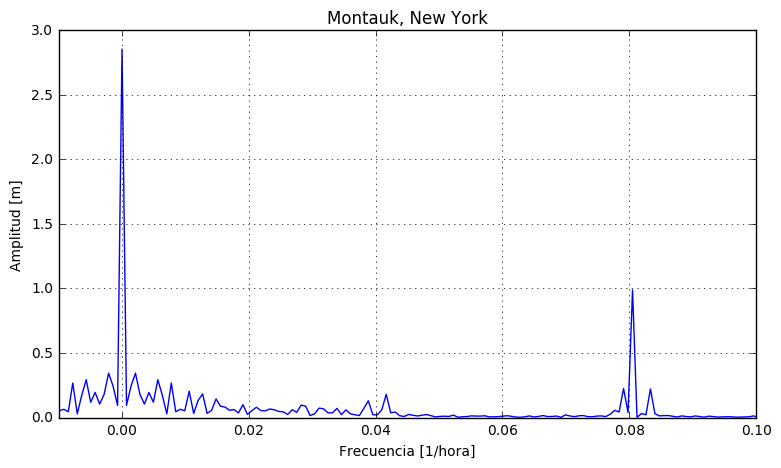

In [12]:
N = 1416
T = 1.0
#aplicacion de la transformada de Fourier
y = df["Water Level"] 
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)

graf = plt.plot(xf, 2.0/N *abs(yplot))
plt.xlim(-0.01,0.1)
plt.grid(True)

plt.xlabel('Frecuencia [1/hora]')
plt.ylabel('Amplitud [m]')
plt.title('Montauk, New York')

fig = plt.gcf()
fig.set_size_inches(9, 5)
plt.show()

In [13]:
a=2*np.absolute(yf)/N

In [23]:
print(np.where(a[:,] > 0.2))
b=a[a[:,] > 0.2]
b

(array([   0,    2,    3,    8,   11,   15,  112,  114,  118, 1298, 1302,
       1304, 1401, 1405, 1408, 1413, 1414]),)


array([ 2.85222599,  0.24277918,  0.34326788,  0.29269803,  0.26692631,
        0.20313162,  0.22477335,  0.98753387,  0.22146781,  0.22146781,
        0.98753387,  0.22477335,  0.20313162,  0.26692631,  0.29269803,
        0.34326788,  0.24277918])

In [24]:
#Amplitudes notorias, fueron ubicadas en la actividad 6
A0_s = np.absolute(yf[int(0),]/N)
A1_s = 2.0*np.absolute(yf[int(55),]/N)
A2_s = 2.0*np.absolute(yf[int(59),]/N)
A3_s= 2.0*np.absolute(yf[int(112),]/N)
A4_s = 2.0*np.absolute(yf[int(114),]/N)
A5_s = 2.0*np.absolute(yf[int(118),]/N)

#PERIODOS
f_A1s = xf[int(708 +55)]
f_A2s = xf[int(708 +59),]
f_A3s =  xf[int(708 +112),]
f_A4s =  xf[int(708 +114),]
f_A5s =  xf[int(708 +118),]

#FASES
qA0s = np.angle(yf[int(0),])
qA1s = np.angle(yf[int(55),])
qA2s = np.angle(yf[int(59),])
qA3s = np.angle(yf[int(112),])
qA4s = np.angle(yf[int(114),])
qA5s = np.angle(yf[int(118),])

In [25]:
w= 2.0*np.pi
a=0
def f(t):
    return A0_s + (A1_s*np.cos(w*f_A1s*t+qA1s) + A2_s*np.cos(w*f_A2s *t+qA2s) 
                   + A3_s*np.cos(w*f_A3s*t+qA3s) + A4_s*np.cos(w*f_A4s*t + qA4s)
                   + A5_s*np.cos(w*f_A5s*t+qA5s))

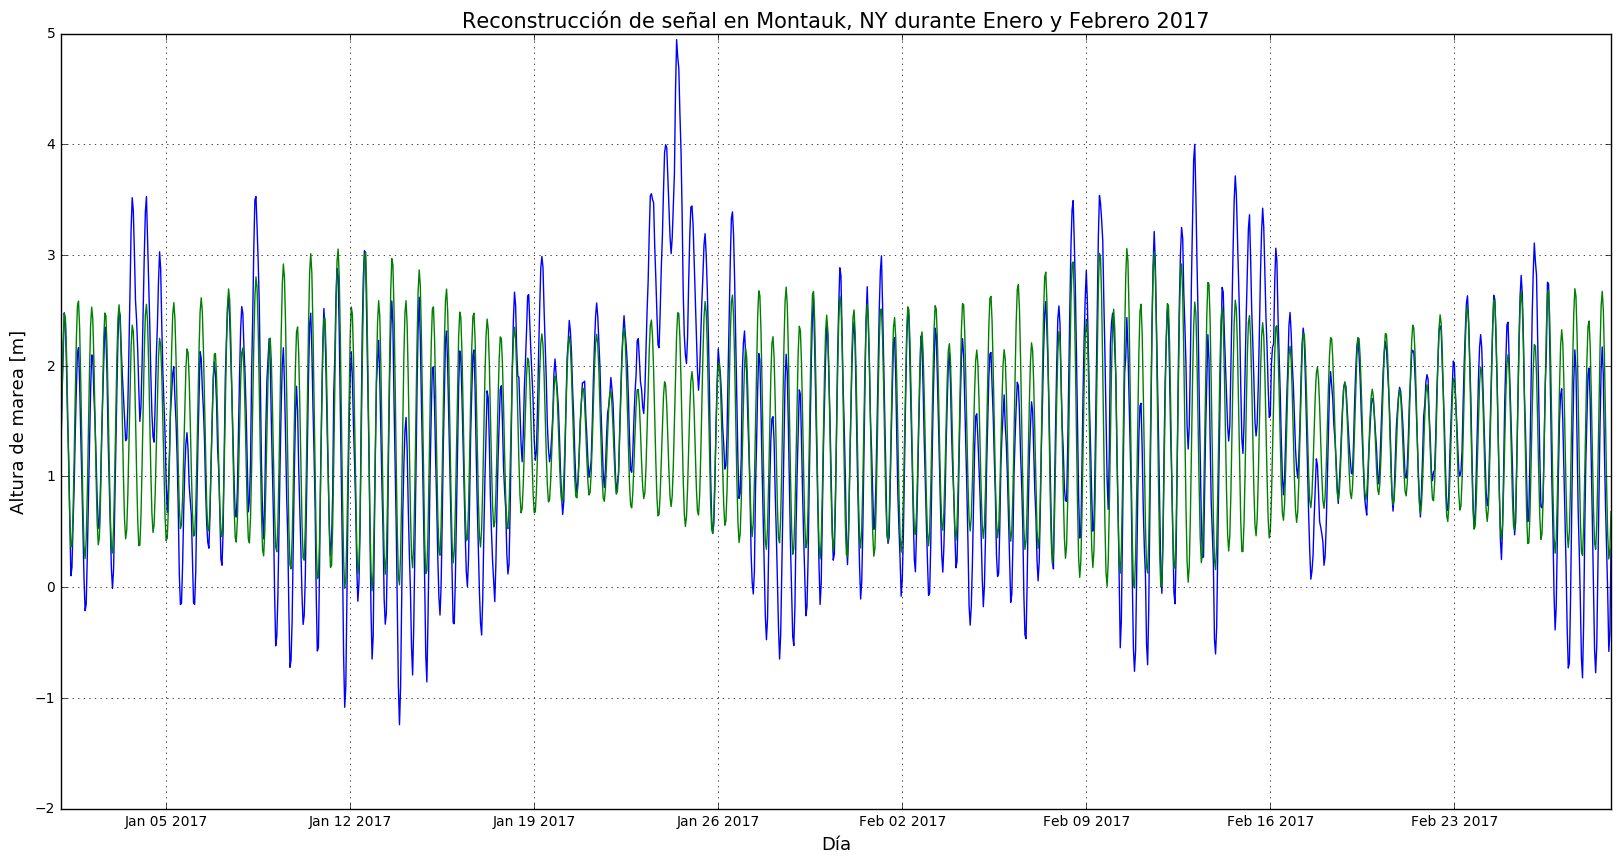

In [31]:
plt.plot(df['Date Time'], df[u'Water Level'], 'b-', label ="Altura")
plt.plot(df['Date Time'], f(df['T']), 'g-', label='Altura reconstruida')
plt.xlim(pd.Timestamp("2017-01-01 0:00"), pd.Timestamp('2017-02-28 23:00'))
plt.ylabel('Altura de marea [m]', fontsize = 13)
plt.xlabel('Día', fontsize = 13)
plt.title('Reconstrucción de señal en Montauk, NY durante Enero y Febrero 2017', fontsize= 15)
plt.grid(True) 

fig = plt.gcf()

fig.set_size_inches(20, 10)
plt.show()

In [32]:
y0=df['Water Level']
y1=f(df['T'])

In [33]:
#ERROR RELATIVO
print()
sum(abs(y0-y1)**2) / sum(abs(y0)**2)

0.1263702753985407